# **1. Import Required Libraries:**

*   tensorflow and keras are for building and training the neural network.
*   numpy handles numerical operations.
*   matplotlib.pyplot is used for plotting images








In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# **Load and Preprocess Data**
*   mnist.load_data() loads a dataset of 70,000 grayscale images of handwritten digits (0-9).
*   x_train and x_test contain image data; y_train and y_test contain labels.
*  Dividing by 255.0 scales pixel values to the range [0, 1] — this normalization helps the model train faster and more accurately


In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Normalize pixel values

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Define the Model Architecture**

*  Flatten: Converts 2D image (28x28) into a 1D vector of 784 values.


*  Dense(128, activation='relu'): A fully connected hidden layer with 128 neurons using ReLU (Rectified Linear Unit) activation.


*  Dropout(0.2): Randomly drops 20% of the neurons during training to prevent overfitting.


*  Dense(10, activation='softmax'): Output layer with 10 neurons (for digits 0–9). Softmax converts outputs to probabilities.




In [ ]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28, 28)), # Input layer (flattening 28x28 images)
 keras.layers.Dense(128, activation='relu'), # Hidden layer with 128 neurons
 keras.layers.Dropout(0.2), # Prevents overfitting
 keras.layers.Dense(10, activation='softmax') # Output layer (10 classes for digits 0-9)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# **Compile the Model**
1.  optimizer='adam': Optimizer that adjusts weights efficiently during training.
2. loss='sparse_categorical_crossentropy': Used for multi-class classification problems with integer labels.
2. metrics=['accuracy']: Tracks the accuracy of the model during training/testing.




In [ ]:
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

# **Train the Model**

*  model.fit(...) runs the training loop for 10 epochs using the training data.

*   validation_data=(x_test, y_test) allows monitoring performance on unseen test data after each epoch.


In [ ]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8578 - loss: 0.4802 - val_accuracy: 0.9581 - val_loss: 0.1365
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9539 - loss: 0.1533 - val_accuracy: 0.9697 - val_loss: 0.0984
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9672 - loss: 0.1073 - val_accuracy: 0.9737 - val_loss: 0.0861
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9720 - loss: 0.0870 - val_accuracy: 0.9770 - val_loss: 0.0736
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9783 - loss: 0.0708 - val_accuracy: 0.9770 - val_loss: 0.0740
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9796 - loss: 0.0629 - val_accuracy: 0.9769 - val_loss: 0.0770
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9816 - loss: 0.0550 - val_accuracy: 0.9791 - val_loss: 0.0661
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9848 - loss: 0.049

# **Evaluate and Make Predictions**

1.model.evaluate(...) computes loss and accuracy on test data.

2.model.predict(x_test) generates probabilities for each digit class per image.

3.np.argmax(predictions[0]) gets the class with the highest probability.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Accuracy: {test_acc}')
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.0808
Accuracy: 0.9797000288963318
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# **Visualize Predictions**


*   Uses matplotlib to display the first test image and its predicted label.




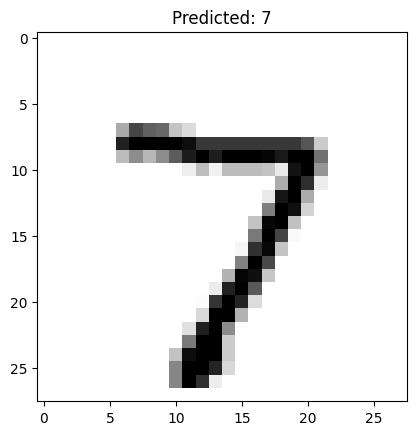

In [ ]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.title(f'Predicted: {np.argmax(predictions[0])}')
plt.show()

# **Example: Linear Regression with TensorFlow**

The model uses sample data that follows the equation y = 3x + 2 to simulate a linear relationship.

Two trainable parameters are initialized: weight (W) and bias (b), both starting at 0.

A learning rate is set to control how much the model updates its parameters during training.

The Stochastic Gradient Descent (SGD) optimizer is used to minimize the loss by adjusting W and b.

A training loop runs for 1000 iterations to progressively improve the model.

In each iteration, the model makes predictions using the current W and b.

The Mean Squared Error (MSE) is calculated to measure how far the predictions are from the actual values.

Gradients of the loss with respect to W and b are computed using automatic differentiation.

The optimizer applies these gradients to update W and b, reducing the loss over time.

After training, the final values of W and b are printed to verify that the model has learned the correct relationship (Trained parameters: W ≈ 3.0, b ≈ 2.0
Prediction for x = 6: y ≈ 20.00)

In [ ]:
import tensorflow as tf
import numpy as np

# Sample data: y = 3x + 2
X_train = np.array([1, 2, 3, 4, 5], dtype=np.float32)
y_train = np.array([5, 8, 11, 14, 17], dtype=np.float32)

# Initialize weights and bias
W = tf.Variable(0.0)
b = tf.Variable(0.0)

# Learning rate and optimizer
learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

# Training loop
for i in range(1000):
    with tf.GradientTape() as tape:
        predictions = W * X_train + b
        loss = tf.reduce_mean(tf.square(predictions - y_train))  #MSE Mean Squared Error

    # Compute gradients and apply them
    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

# Results
print(f"Trained parameters: W = {W.numpy():.4f}, b = {b.numpy():.4f}")
print(f"Prediction for x = 6: y = {W.numpy() * 6 + b.numpy():.2f}")



Trained parameters: W = 3.0102, b = 1.9633
Prediction for x = 6: y = 20.02


# **Hands-On: Learning About TensorFlow**


**1. Installing TensorFlow:**

In [ ]:
pip install tensorflow

## **2. Creating Tensors**

In [ ]:
import tensorflow as tf
a = tf.constant([[1, 2], [3, 4]])
print(a)


tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


**3. Building and training a neural network using Keras:**



In [ ]:
model = tf.keras.Sequential([
 tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
 tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **MLP Networks**

# **Hands-On: Using an MLP**
**Practical Implementation**
**Objective**: Build and train an MLP model for classifying handwritten digits from the MNIST
dataset.
Steps:
1. **Load the Dataset**: Import MNIST from TensorFlow/Keras.
2. **Preprocess Data**: Normalize pixel values to [0,1].
3. **Define MLP Model**:

*   *Input Layer*: 784 neurons (for 28x28 images)

*  *Hidden Layers*: Two layers with ReLU activation

* *Output Layer*: 10 neurons (for digits 0-9) with Softmax activation





4. **Compile Model**: Use categorical cross-entropy loss and Adam optimizer.
5. **Train the Model**: Fit the model on the training dataset.
6. **Evaluate Model**: Measure accuracy on test data.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Converts 28x28 image into 784-element vector
    Dense(128, activation='relu'),       # First hidden layer with 128 neurons
    Dense(64, activation='relu'),        # Second hidden layer with 64 neurons
    Dense(10, activation='softmax')      # Output layer for 10 digit classes (0–9)
])

# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
# Evaluate the trained model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8810 - loss: 0.4159 - val_accuracy: 0.9600 - val_loss: 0.1264
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9674 - loss: 0.1063 - val_accuracy: 0.9725 - val_loss: 0.0933
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9784 - loss: 0.0704 - val_accuracy: 0.9726 - val_loss: 0.0850
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9841 - loss: 0.0511 - val_accuracy: 0.9746 - val_loss: 0.0808
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9866 - loss: 0.0412 - val_accuracy: 0.9759 - val_loss: 0.0822
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9897 - loss: 0.0316 - val_accuracy: 0.9746 - val_loss: 0.0882
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9917 - loss: 0.0263 - val_accuracy: 0.9786 - val_loss: 0.0775
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9930 - loss: 0.0

# **Recurrent Neural Networks (RNN)**

## **Problem:**  
**Classify the sentiment (positive/negative) of a sentence using an RNN.**

## **Dataset:**  
**A sample dataset like the IMDB movie review dataset**  
(Each entry is a review labeled as positive or negative.)

**Steps**:

**1**. **Preprocessing**:

*  Tokenize each review (convert words to integers).
*  Pad sequences to the same length.

## 2. **Model** **Architecture** **(Simple RNN using Keras)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Load dataset
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
# Pad sequences
maxlen = 500
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
# Define model
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
# Compile and train
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 73s 182ms/step - accuracy: 0.5755 - loss: 0.6596 - val_accuracy: 0.8150 - val_loss: 0.4200
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 185ms/step - accuracy: 0.8274 - loss: 0.3954 - val_accuracy: 0.6638 - val_loss: 0.6045
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 182ms/step - accuracy: 0.8655 - loss: 0.3451 - val_accuracy: 0.7420 - val_loss: 0.5721
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 73s 158ms/step - accuracy: 0.9597 - loss: 0.1355 - val_accuracy: 0.8099 - val_loss: 0.5021
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 91s 180ms/step - accuracy: 0.9912 - loss: 0.0412 - val_accuracy: 0.8013 - val_loss: 0.5889


**Explanation:**

*   **Embedding Layer**: Transforms word indices into dense vectors.

*  ** SimpleRNN Layer:** Processes the sequence, maintains hidden state across time.


* ** Dense Output Layer:** Produces a single probability (positive or negative sentiment).

**Benefits of RNN:**

*   Captures context and sequence (e.g., "not good" vs "very good").
*   Learns temporal dependencies that MLPs would miss.





In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
vocab_size = 10000
maxlen = 500  # Moved maxlen up for better organization

# Load dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure equal length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),  # Added input_length for clarity
    SimpleRNN(units=32),  # Added `units=` for clarity (optional)
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 73s 181ms/step - accuracy: 0.5862 - loss: 0.6560 - val_accuracy: 0.8394 - val_loss: 0.3718
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 71s 154ms/step - accuracy: 0.8545 - loss: 0.3470 - val_accuracy: 0.8523 - val_loss: 0.3639
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 93s 183ms/step - accuracy: 0.8989 - loss: 0.2520 - val_accuracy: 0.8143 - val_loss: 0.4256
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 183ms/step - accuracy: 0.9584 - loss: 0.1264 - val_accuracy: 0.8360 - val_loss: 0.4536
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 184ms/step - accuracy: 0.9823 - loss: 0.0625 - val_accuracy: 0.8364 - val_loss: 0.5182


# **Convolutional Neural Networks (CNN)**

Convolutional Neural Networks (CNNs) are specialized deep learning architectures designed

Primarily for image processing tasks. They utilize a series of convolutional layers to extract

Hierarchical features from images, making them highly effective for visual recognition.


# **Let's implement a basic CNN using TensorFlow and Keras to classify handwritten digits from the MNIST dataset:**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Normalize
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# Define CNN model
model = models.Sequential([
 layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, (3,3), activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(10, activation='softmax')
])
# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9102 - loss: 0.2891 - val_accuracy: 0.9868 - val_loss: 0.0390
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9869 - loss: 0.0443 - val_accuracy: 0.9875 - val_loss: 0.0375
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9930 - loss: 0.0243 - val_accuracy: 0.9890 - val_loss: 0.0320
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9943 - loss: 0.0195 - val_accuracy: 0.9882 - val_loss: 0.0413
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9957 - loss: 0.0136 - val_accuracy: 0.9899 - val_loss: 0.0328


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape to add channel dimension (since it's grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Optional: Add callbacks like early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# Train the model
model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9135 - loss: 0.2818 - val_accuracy: 0.9857 - val_loss: 0.0442
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9859 - loss: 0.0444 - val_accuracy: 0.9878 - val_loss: 0.0362
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.9909 - loss: 0.0279 - val_accuracy: 0.9878 - val_loss: 0.0357
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9934 - loss: 0.0200 - val_accuracy: 0.9885 - val_loss: 0.0379
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9956 - loss: 0.0156 - val_accuracy: 0.9916 - val_loss: 0.0270
313/313 - 2s - 7ms/step - accuracy: 0.9916 - loss: 0.0270
Test accuracy: 0.9916


# **Recurrent Neural Networks (RNN)**

A Recurrent Neural Network (RNN) is a class of artificial neural networks designed to recognize patterns in sequences of data, such as time series, speech, text, or video frames.

# **Practical Example: Text Sentiment Classification**
# Problem: Classify the sentiment (positive/negative) of a sentence using an RNN.
# Dataset:A sample dataset like the IMDB movie review dataset (each entry is a review labeled as positive or negative).

**Steps**

1. Preprocessing:



*   Tokenize each review (convert words to integers).
*   Pad sequences to the same length



2. Model Architecture (Simple RNN using Keras):


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Load dataset
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
# Pad sequences
maxlen = 500
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
# Define model
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
# Compile and train
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 61s 151ms/step - accuracy: 0.6031 - loss: 0.6436 - val_accuracy: 0.8146 - val_loss: 0.4315
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 144ms/step - accuracy: 0.8377 - loss: 0.3809 - val_accuracy: 0.7894 - val_loss: 0.4722
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 150ms/step - accuracy: 0.9014 - loss: 0.2628 - val_accuracy: 0.8198 - val_loss: 0.4375
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 143ms/step - accuracy: 0.9589 - loss: 0.1267 - val_accuracy: 0.8267 - val_loss: 0.5055
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - accuracy: 0.9796 - loss: 0.0701 - val_accuracy: 0.7825 - val_loss: 0.6479


# **Long Short-Term Memory (LSTM)**
LSTM is a special type of Recurrent Neural Network (RNN) capable of learning
long-term dependencies. It was introduced by Hochreiter and Schmidhuber in 1997 to address the vanishing gradient problem common in standard RNNs.

Hands-On: Using an LSTM Model (with Code)

In [5]:

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDB dataset (pre-tokenized)
vocab_size = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to have equal length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Define LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=maxlen))
model.add(LSTM(64)) # Main LSTM layer
model.add(Dense(1, activation='sigmoid')) # Output layer

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 176s 443ms/step - accuracy: 0.6915 - loss: 0.5520 - val_accuracy: 0.8539 - val_loss: 0.3480
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 200s 438ms/step - accuracy: 0.8090 - loss: 0.4358 - val_accuracy: 0.8426 - val_loss: 0.3726
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 203s 442ms/step - accuracy: 0.9024 - loss: 0.2532 - val_accuracy: 0.8598 - val_loss: 0.3479


In [6]:
# Evaluate model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.8589 - loss: 0.3451
Test Accuracy: 0.86


# **Recursive Neural Networks (RecNNs)**
Recursion is a programming concept where a function calls itself to solve a problem by breaking it down into smaller sub-problems of the same type.

# **Example: Binary Tree Sentiment Classification**
Define a simple Tree and Recursive Model in PyTorch

torch.tensor([node.value]) creates a 1D tensor so nn.Embedding can work correctly. You could also use torch.LongTensor.

squeeze(0) removes the batch dimension; if you’re batching trees later, you'll need to handle this differently.

The tree structure is assumed binary. For n-ary trees, self.W and forward() logic must be generalized.

You might consider adding a classification layer after the root representation for tasks like sentiment prediction.

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Sample tree node class
class TreeNode:
    def __init__(self, left=None, right=None, value=None):
        self.left = left
        self.right = right
        self.value = value  # Word index (int)

# Recursive Neural Network
class RecNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(RecNN, self).__init__()
        self.embedding = nn.Embedding(10000, input_dim)
        self.projection = nn.Linear(input_dim, hidden_dim)
        self.W = nn.Linear(2 * hidden_dim, hidden_dim)

    def forward(self, node):
        if node.left is None and node.right is None:
            # Leaf node: use embedding and projection
            embed = self.embedding(torch.tensor([node.value]))
            return self.projection(embed).squeeze(0)
        else:
            # Recursive composition of child vectors
            left_vec = self.forward(node.left)
            right_vec = self.forward(node.right)
            combined = torch.cat((left_vec, right_vec), dim=-1)
            return F.relu(self.W(combined))

# Example usage
# Tree: (great (not movie)) => root: "great", left: great, right: subtree(not, movie)
left_leaf = TreeNode(value=2)  # "not"
right_leaf = TreeNode(value=3)  # "movie"
intermediate = TreeNode(left=left_leaf, right=right_leaf)  # ("not movie")
root = TreeNode(left=TreeNode(value=1), right=intermediate)  # ("great (not movie)")

# Initialize model
model = RecNN(input_dim=50, hidden_dim=64)

# Forward pass
sentence_vector = model(root)

print("Final representation vector shape:", sentence_vector.shape)
print("Vector:", sentence_vector)


Final representation vector shape: torch.Size([64])
Vector: tensor([0.0000, 0.1324, 0.0000, 0.0000, 0.1727, 0.1428, 0.0000, 0.1723, 0.4241,
        0.0746, 0.1625, 0.0000, 0.4063, 0.0000, 0.0000, 0.4696, 0.0000, 0.0000,
        0.5148, 0.1266, 0.0982, 0.0000, 0.1898, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2080, 0.2393, 0.0000, 0.0000, 0.0924, 0.1185, 0.0000, 0.0000, 0.0000,
        0.0698, 0.0000, 0.0000, 0.2466, 0.0000, 0.0000, 0.2065, 0.0000, 0.0000,
        0.0370, 0.0000, 0.2152, 0.0000, 0.3020, 0.0000, 0.0373, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.3088, 0.0717, 0.3907, 0.1338, 0.4520, 0.0000,
        0.0000], grad_fn=<ReluBackward0>)
